In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("winemag-data_first150k.csv")

In [ ]:
df1 = data.groupby(['variety'])['variety'].count()

In [ ]:
print(df1)

variety
Agiorgitiko                120
Aglianico                  317
Aidani                       1
Airen                        6
Albana                      17
                          ... 
Zierfandler-Rotgipfler       3
Zinfandel                 3799
Zlahtina                     4
Zweigelt                   219
Žilavka                      2
Name: variety, Length: 632, dtype: int64


In [ ]:
data['frequency'] = data['variety'].map(data['variety'].value_counts())

removing wines with less than 1000 reviews

In [ ]:
data.drop(data[data['frequency'] <= 1000].index, inplace = True)

In [ ]:
data

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,frequency
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12800
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6320
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,14291
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,14291
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,14291
...,...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,2824
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1238
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,2824
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1238


deleting wines which can't be classified into red/white

In [ ]:
data['variety'].unique()

array(['Cabernet Sauvignon', 'Sauvignon Blanc', 'Pinot Noir',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Rosé', 'Syrah',
       'Sangiovese', 'Sparkling Blend', 'Red Blend', 'Riesling',
       'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Viognier',
       'Pinot Grigio', 'Cabernet Franc', 'White Blend', 'Zinfandel',
       'Barbera', 'Rhône-style Red Blend', 'Bordeaux-style Red Blend',
       'Merlot', 'Bordeaux-style White Blend', 'Grüner Veltliner',
       'Shiraz', 'Champagne Blend', 'Port',
       'Corvina, Rondinella, Molinara', 'Sangiovese Grosso'], dtype=object)

In [ ]:
df_drop = data[(data["variety"]=="Rosé") | (data["variety"]=="Sparkling Blend") |
   (data["variety"]=="Red Blend") | (data["variety"]=="White Blend") |
   (data["variety"]=="Rhône-style Red Blend")
   | (data["variety"]=="Bordeaux-style Red Blend")
   | (data["variety"]=="Champagne Blend")].index

In [ ]:
data.drop(df_drop , inplace=True)

In [ ]:
data['variety'].unique()

array(['Cabernet Sauvignon', 'Sauvignon Blanc', 'Pinot Noir',
       'Chardonnay', 'Tempranillo', 'Malbec', 'Syrah', 'Sangiovese',
       'Riesling', 'Portuguese Red', 'Nebbiolo', 'Pinot Gris', 'Viognier',
       'Pinot Grigio', 'Cabernet Franc', 'Zinfandel', 'Barbera', 'Merlot',
       'Bordeaux-style White Blend', 'Grüner Veltliner', 'Shiraz', 'Port',
       'Corvina, Rondinella, Molinara', 'Sangiovese Grosso'], dtype=object)

In [ ]:
#Function to classify wines into red/white
def type_of_wine(value):
    if value=="Cabernet Sauvignon":
        return "red"
    if value=="Sauvignon Blanc":
        return "white"
    if value=="Pinot Noir":
        return "red"
    if value=="Chardonnay":
        return "white"
    if value=="Tempranillo":
        return "red"
    if value=="Malbec":
        return "red"
    if value=="Syrah":
        return "red"
    if value=="Sangiovese":
        return "red"
    if value=="Riesling":
        return "white"
    if value=="Portuguese Red":
        return "red"
    if value=="Nebbiolo":
        return "red"
    if value=="Pinot Gris":
        return "white"
    if value=="Viognier":
        return "white"
    if value=="Pinot Grigio":
        return "white"
    if value=="Cabernet Franc":
        return "red"
    if value=="Zinfandel":
        return "red"
    if value=="Barbera":
        return "red"
    if value=="Merlot":
        return "red"
    if value=="Grüner Veltliner":
        return "white"
    if value=="Shiraz":
        return "red"
    if value=="Port":
        return "red"
    if value=="Corvina, Rondinella, Molinara":
        return "red"
    if value=="Sangiovese Grosso":
        return "red"
    if value=="Chardonnay":
        return "white"
    if value=="Chardonnay":
        return "white"


In [ ]:
data = data[['description','points','price','variety','type of wine']].copy()
print(data.shape)
with pd.option_context('mode.use_inf_as_na', True):
  data.dropna(inplace=True)

In [ ]:
data['type of wine'] = data['variety'].map(type_of_wine)

In [ ]:
dict1 = {"red":int(0), "white":int(1)}
data["type of wine"] = data["type of wine"].map(dict1)

In [ ]:
data.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,frequency,type of wine
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12800.0,0.0
1,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6320.0,1.0
2,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,14291.0,0.0
3,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,14291.0,0.0
4,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,14291.0,0.0
5,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291.0,0.0
6,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291.0,0.0
7,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,14291.0,0.0
8,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,14482.0,1.0
9,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,12800.0,0.0


In [ ]:
import re
import nltk
nltk.download("punkt")
nltk.download("wordnet")
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Adding necessary stop words to the list

In [ ]:
stop_words.append("wine")
stop_words.append("winery")
stop_words.append("vineyard")
stop_words.append("red")
stop_words.append("white")



In [ ]:
stop_words.append("cabernet sauvignon")
stop_words.append("sauvignon blanc")
stop_words.append("pinot noir")
stop_words.append("chardonnay")
stop_words.append("tempranillo")
stop_words.append("malbec")
stop_words.append("syrah")
stop_words.append("sangiovese")
stop_words.append("riesling")
stop_words.append("portuguese red")
stop_words.append("nebbiolo")
stop_words.append("pinot gris")
stop_words.append("viognier")
stop_words.append("pinot grigio")
stop_words.append("cabernet franc")
stop_words.append("zinfandel")
stop_words.append("barbera")
stop_words.append("merlot")
stop_words.append("grüner veltliner")
stop_words.append("shiraz")
stop_words.append("port")
stop_words.append("corvina, rondinella, molinara")
stop_words.append("sangiovese grosso")
stop_words.append("chardonnay")


In [ ]:
data['clean_description'] = ''

removing all the stop words and tokenizing the data description

In [ ]:
for index, row in data.iterrows():
  filter_sentence = []
  sentence = row['description']
  sentence  = sentence.lower()
  sentence = re.sub(r'[^\w\s]', '', sentence)
  words = nltk.word_tokenize(sentence)
  words = [w for w in words if w not in stop_words]
  for i in words:
    filter_sentence.append(lemmatizer.lemmatize(i))
  print(index)
  print(filter_sentence)
  data.at[index, 'clean_description'] = filter_sentence

Streaming output truncated to the last 5000 lines.
16282
['compared', 'estate', 'caterina', 'expression', 'barolo', 'lazzairasco', 'cru', 'delivers', 'higher', 'intensity', 'term', 'spice', 'vanilla', 'tone', 'young', 'well', 'structured', 'lively', 'fresh', 'elegant', 'mouthfeel']
16283
['one', 'driest', 'viogniers', 'california', 'also', 'one', 'elegant', 'doesnt', 'explode', 'exotic', 'richness', 'way', 'viogniers', 'fine', 'noble', 'minerally', 'nuance', 'tropical', 'citrus', 'fruit', 'really', 'open', 'whole', 'new', 'direction']
16284
['here', 'evolved', 'sophisticated', 'barolo', 'riserva', 'savory', 'aroma', 'crushed', 'black', 'pepper', 'balsam', 'humus', 'old', 'spice', 'licorice', 'root', 'beer', 'drying', 'streamlined', 'mouth', 'long', 'finish', 'accented', 'lively', 'fruit', 'flavor']
16285
['there', 'lot', 'new', 'french', 'oak', 'cabernet', 'underlying', 'powerful', 'enough', 'take', 'show', 'rich', 'gentle', 'tannin', 'fine', 'acidity', 'framing', 'complex', 'flavorful

In [ ]:
data.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,frequency,type of wine,clean_description
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12800.0,0.0,
1,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,6320.0,1.0,
2,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,14291.0,0.0,
3,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,14291.0,0.0,
4,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,14291.0,0.0,
5,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291.0,0.0,
6,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291.0,0.0,
7,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,14291.0,0.0,
8,US,"First made in 2006, this succulent luscious Ch...",Sigrid,95,90.0,Oregon,Willamette Valley,Willamette Valley,Chardonnay,Bergström,14482.0,1.0,
9,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,12800.0,0.0,


Converting df to csv file

In [ ]:
data.to_csv("final_dataset.csv", index = False)

In [ ]:
data.describe()

,points,price,frequency,type of wine
count,96697.000000,90083.000000,96697.000000,95436.000000
mean,87.958613,34.533286,8081.651664,0.327979
std,3.296317,36.554848,5266.183046,0.469480
min,80.000000,4.000000,1042.000000,0.000000
25%,86.000000,16.000000,3208.000000,0.000000
50%,88.000000,25.000000,5825.000000,0.000000
75%,90.000000,42.000000,14291.000000,1.000000
max,100.000000,2013.000000,14482.000000,1.000000


1. The points vary between 80 to 100.
2. The standard deviation of price is high, meaning the prices are more spread out.

Number of countries in data: 39


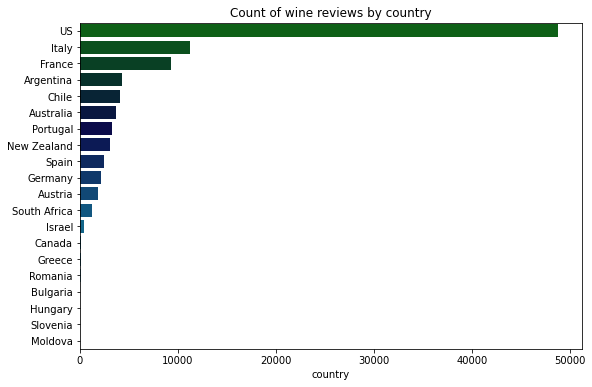

In [ ]:
print('Number of countries in data:',data['country'].nunique())
plt.figure(figsize=(9,6))
cnt = data['country'].value_counts().to_frame()[0:20]
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='ocean',orient='h')
plt.title('Count of wine reviews by country');

US contributes the most to this wine reviews in the dataset.

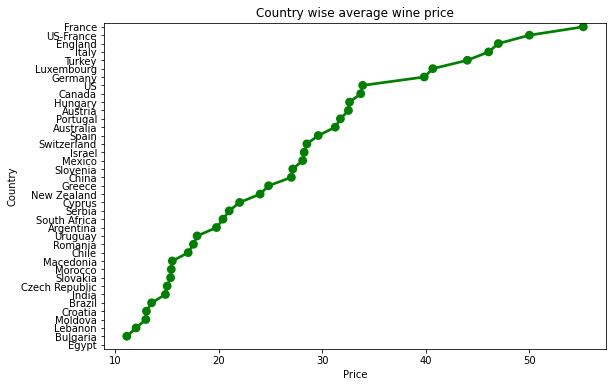

In [ ]:
cnt = data.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(9,6))
sns.pointplot(x = cnt['price'] ,y = cnt.index ,color='g',orient='h',markers='o')
plt.title('Country wise average wine price')
plt.xlabel('Price')
plt.ylabel('Country');

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text = " ".join(review for review in data.description)

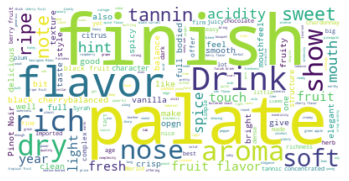

In [ ]:
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df1=data[data['type of wine']=="red"]

df2=data[data['type of wine']=="white"]

In [ ]:
df1.head(10)

,country,description,designation,points,price,province,region_1,region_2,variety,winery,frequency,type of wine
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,12800,red
2,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,14291,red
3,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström,14291,red
4,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm,14291,red
5,US,"From 18-year-old vines, this supple well-balan...",Estate Vineyard Wadensvil Block,95,48.0,Oregon,Ribbon Ridge,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291,red
6,US,A standout even in this terrific lineup of 201...,Weber Vineyard,95,48.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Patricia Green Cellars,14291,red
7,US,"With its sophisticated mix of mineral, acid an...",Grace Vineyard,95,185.0,Oregon,Dundee Hills,Willamette Valley,Pinot Noir,Domaine Serene,14291,red
9,US,"This blockbuster, powerhouse of a wine suggest...",Rainin Vineyard,95,325.0,California,Diamond Mountain District,Napa,Cabernet Sauvignon,Hall,12800,red
10,Spain,"Nicely oaked blackberry, licorice, vanilla and...",6 Años Reserva Premium,95,80.0,Northern Spain,Ribera del Duero,NaN,Tempranillo,Valduero,2556,red
11,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette,3208,red


In [ ]:
df1.to_csv("red_final.csv", index = False)

In [ ]:
df2.to_csv("white_final.csv", index = False)

In [ ]:
text1 = " ".join(review for review in df1.description)

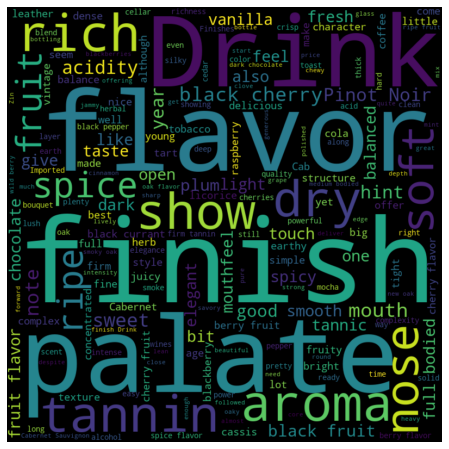

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,stopwords=stop_words, background_color="black").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

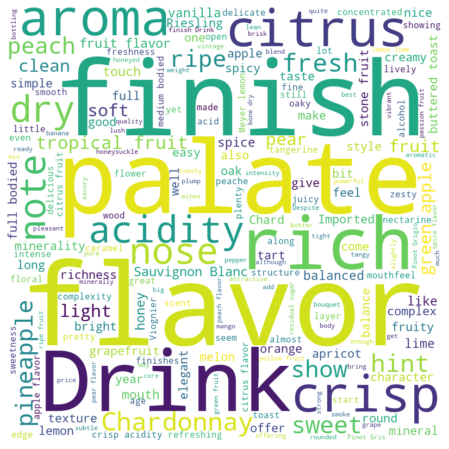

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,stopwords=stop_words, background_color="white").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Number of varity of wines 24


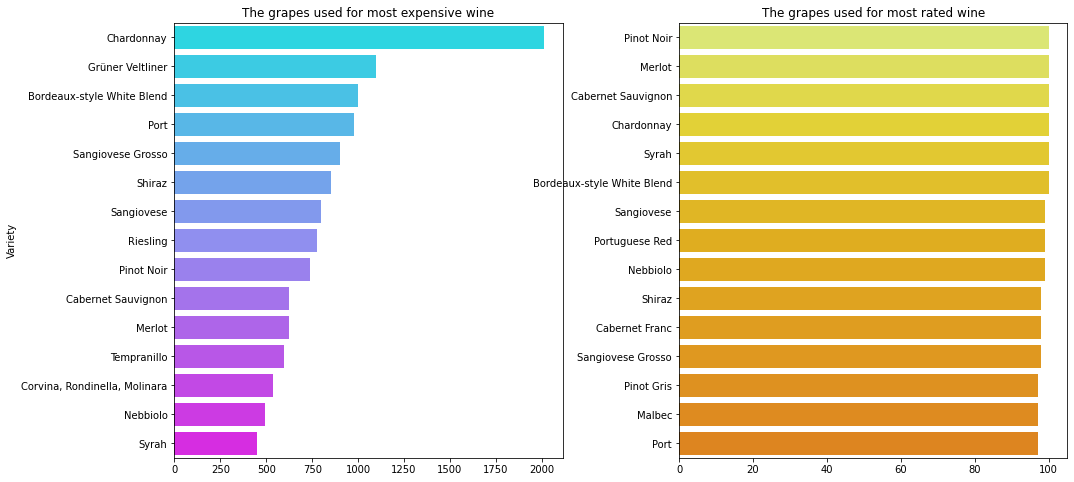

In [ ]:
print('Number of varity of wines',data['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

cnt = data.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'cool',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
cnt = data.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['points'], y = cnt.index, palette = 'Wistia',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);